# Statistical Power Basics

Reference: §6.13 and §6.13 in Navidi (2015).

In [1]:
# load libraries
import scipy.stats as stats
from scipy.stats import norm
import numpy as np
import math
import matplotlib.pyplot as plt

## Learning Objectives

After studying this notebook, completing the activities, participating in class, and reviewing your notes, should be able to:
* Compute statistical power.
* Explain the significance of the statistical power calculation.

## Definition

The **power** of a statistical test, $1-\beta$, is the **probability of rejecting $H_0$ given $H_a$ is true**:

$$
\mathrm{power} = 1 - \beta = \mathbb{P}\left(~\mathrm{reject}~H_0 ~~|~~ H_a~\mathrm{is~true}~\right)
$$

In other words, statistical power measures our ability to detect something new (alternate hypothesis) within background uncertainty. Several factors impact statistical power:
* The statistical significance level $\alpha$
* Magnitude of the effect of interest in the population
* Sample size

Statistical power calculations should be done before gathering data. They help inform experiment design.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: A test has power 0.9 when $\mu = 15$. Determine if each statement below is true or false. Store your answer in the Python dictionary <tt>tf_18c</tt> using 1, 2, 3, and 4 as the key.
</div>

Statements:
1. The probability of rejecting $H_0$ when $\mu = 15$ is 0.90.
2. The probability of making a correct decision when $\mu = 15$ is 0.90.
3. The probability of making a correct decision when $\mu = 15$ is 0.10.
4. The probability that $H_0$ is true when $\mu = 15$ is 0.10.

In [2]:
# Declare dictionary. You need to change each entry to True or False.
# Do not use 'True' or 'False', but instead True or False
tf_18c = {}
tf_18c[1] = 'change me'
tf_18c[2] = 'change me'
tf_18c[3] = 'change me'
tf_18c[4] = 'change me'

### BEGIN SOLUTION
tf_18c[1] = True
tf_18c[2] = True
tf_18c[3] = False
tf_18c[4] = False
### END SOLUTION


In [3]:
### BEGIN HIDDEN TESTS

for i in range(1,5):
    assert type(tf_18c[i]) is bool, "The values in the dictionary tf_18_c must be True or False not strings."

assert tf_18c[1] is True, "This is the definition of statistical power."

assert tf_18c[2] is True, "When mu = 15, the correct decision is to fail to reject H0. This occurs with probability 0.90."

assert tf_18c[3] is False, "When mu = 15, the correct decision is to fail to reject H0. This occurs with probability 0.90."

assert tf_18c[4] is False, "We cannot compute the probability H0 is true."

### END HIDDEN TESTS

## Motivating Example

We want to test if a new chemical manufacturing process has a high yield than the current process. Based on years of historical data, we know the current process has a mean yield 80 and standard deviation 5. The units for yield are percentage of the theoretical maximum. We drop the "%" symbol for clarity.

Our supervisor proposed to **run the new process 50 times** and then perform hypothesis testing using significance level $\alpha$ = 0.05:

$$H_0: \mu \leq 80 \qquad \mathrm{versus} \qquad H_a: \mu > 80$$

where $\mu$ is the mean yield of the new process. But running 50 tests is expensive. Eyeing a new promotion, you want to know if it is reasonable to run only 20 or 30 experiments. **You need to perform a statistical power calculation.** We will walk through the steps now.

## Step 1. Fix the experiment design, make assumptions.

More specifically, we need to:
* Fix the number of experiments, for example $n$ = 50
* Fix the significance level, for example $\alpha$ = 0.05
* Assume the mean for the new process yield, for example $\mu$ = 81 (a modest improvement in yield)
* Assume the standard deviation for the new process yield, for example $\sigma$ = 5 (same as old process)

In [4]:
# number of trials
n = 50

# significance level
alpha = 0.05

# assumed mean and standard deviation for new process (alternate distribution)
mu = 81
s = 5

# mean and standard deviation for current process (null distribution)
mu0 = 80
s0 = 5

## Step 2. Compute the rejection region.

We want to calculate the sample mean (yield averaged over the $n$ = 50 runs) threshold that corresponds with the specified significance level $\alpha = 0.05$. Because we have such a large sample size, we will use the normal distribution (z-test) for simplicity.

In [5]:
# This function is the inverse cdf for a normal distribution.
# We give it the probability and it gives the corresponding z value.
z = stats.norm.ppf(1-alpha)
print(z)

1.6448536269514722


Thus we will reject the null hypothesis for set of 50 runs where the $z > 1.1645$. We will call this the **rejection region**.

![](https://drive.google.com/uc?export=view&id=1eiJt3uTmYLbOJVQOZ_P3vTo0ESa5tbpl)

We can go a step further and express this $z$ cutoff in terms of the sample mean. Recall,

$$
z = \frac{\bar{X}_{rr} - \mu_0}{\sigma_0/\sqrt{n}}
$$

A little algebra, and

$$
\bar{X}_{rr} = z \frac{\sigma_0}{\sqrt{n}} + \mu_0
$$

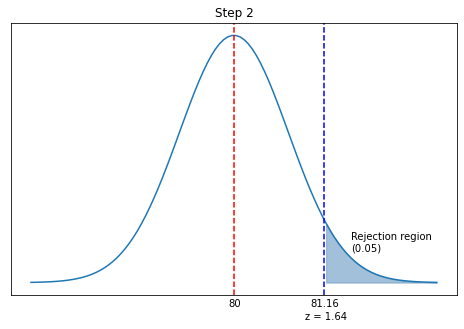

In [6]:
# Significant level(α)
alpha = 0.05
# Critical value for α
crit_val = norm.ppf(1-alpha)
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
plt.figure(figsize=(8,5))
plt.plot(x, norm.pdf(x))
plt.fill_between(x[x>crit_val], 0, norm.pdf(x)[x>crit_val].flatten(),alpha=0.5, color='steelblue')
plt.axvline(x=crit_val,color='b',linestyle='dashed')
plt.axvline(x=0,color='r',linestyle='dashed')
plt.text(crit_val-0.35, -.06, 'z = 1.64'.format(round(crit_val,2), str(alpha)), fontsize=10)
plt.text(crit_val-0.25, -.04, '81.16'.format(round(crit_val,2), str(alpha)), fontsize=10)
plt.text(0-.1, -.04, '80'.format(round(crit_val,2), str(alpha)), fontsize=10)
plt.text(crit_val+0.5, 0.05, 'Rejection region\n('+str(alpha)+')', fontsize=10)
plt.title('Step 2')
ax = plt.gca()
plt.xticks([])
plt.yticks([])
plt.show()



1.6448536269514722


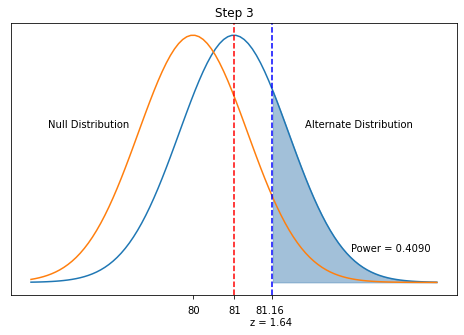

In [7]:
# Significant level(α)
alpha = 0.05
# Critical value for α
crit_val = norm.ppf(1-alpha)
print(crit_val)
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
plt.figure(figsize=(8,5))
plt.plot(x, norm.pdf(x), x, norm.pdf(x+.75))
plt.fill_between(x[x>.7], 0, norm.pdf(x)[x>.7].flatten(),alpha=0.5, color='steelblue')
plt.axvline(x=.7,color='b',linestyle='dashed')
plt.axvline(x=0,color='r',linestyle='dashed')
#plt.axvline(x=0-.75,color='k',linestyle='dashed', alpha=.8)
plt.text(.3, -.07, 'z = 1.64'.format(round(crit_val,2), str(alpha)), fontsize=10)
plt.text(.4, -.05, '81.16'.format(round(crit_val,2), str(alpha)), fontsize=10)
plt.text(0-.1, -.05, '81'.format(round(crit_val,2), str(alpha)), fontsize=10)
plt.text(0-.85, -.05, '80'.format(round(crit_val,2), str(alpha)), fontsize=10)
plt.text(crit_val+0.5, 0.05, 'Power = 0.4090', fontsize=10)
plt.text(-3.4, 0.25, 'Null Distribution', fontsize=10)
plt.text(1.3, 0.25, 'Alternate Distribution', fontsize=10)

plt.title('Step 3')
ax = plt.gca()
plt.xticks([-.75,0,.7])
ax.set_xticklabels([])
plt.yticks([])
plt.show()

In [8]:
rr = z*s0/math.sqrt(n) + mu0
print(rr)

81.16308715367667


Thus we reject the null hypothesis when $\bar{X} > 81.16$.

## Step 3. Compute the statistical power.

We will now construct the alternate distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$. Recall, we assumed values for $\mu$ and $\sigma$ in Step 1. We will then calculate the probability of drawing a sample mean from the alternate distribution that is in the rejection region.

We want to calculate, under the assumed alternate distribution, the probably of drawing a sample mean that is in the rejection zone. This is the shaded area in the figure above.

$$
z_1 = \frac{\bar{X}_{rr} - \mu}{\sigma / \sqrt{n}}
$$

$$
\mathrm{power} = \mathbb{Pr}[Z \geq z_1], \qquad Z \sim \mathcal{N}(0,1)
$$

In [9]:
z1 = (rr - mu)/(s/math.sqrt(n))
print("z1 =",z1)
print("power =",1 - stats.norm.cdf(z1))

z1 = 0.23064006457837258
power = 0.4087972197938724


**Interpretation** Even with 50 experiments, there is only a 40.9% chance we will reject the null hypothesis and conclude the new process is better. Remember, the calculated statistical power depends on $n$, $\alpha$, $\mu$ and $\sigma$ (assumptions).

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Based on this analysis, your team concludes that improving yield from 80 to 81 percent of theoretical maximum performance is not worth the capital investment. Upper management will only approve the new process if it has a mean yield of at least 84 percent. Copy the code for above to answer the following two questions.
</div>

## Activity: Question 1

What is the statistical power with $n=50$ if we assume the mean yield of the new process is 84 and same standard deviation of the current process? Store your answer in the Python float `ans_18c_i`.

In [10]:
# Hint: Copy and paste the code for the three steps above, then modify.

## Step 1

## BEGIN SOLUTION

# number of trials
n = 50

# significance level
alpha = 0.05

# assumed mean and standard deviation for new process (alternate distribution)
mu = 84
s = 5

# mean and standard deviation for current process (null distribution)
mu0 = 80
s0 = 5

## END SOLUTION

## Step 2

### BEGIN SOLUTION
z = stats.norm.ppf(1-alpha)
rr = z*s0/math.sqrt(n) + mu0
print(rr)

### END SOLUTION

## Step 3

### BEGIN SOLUTION
z1 = (rr - mu)/(s/math.sqrt(n))
print("z1 =",z1)
p = 1 - stats.norm.cdf(z1)
print("power =",p)
### END SOLUTION

## Store answer (statistical power) in ans_18c_i.

### BEGIN SOLUTION
ans_18c_i = p
### END SOLUTION

81.16308715367667
z1 = -4.012000622540913
power = 0.9999698968293542


In [11]:
### BEGIN HIDDEN TESTS

assert ans_18c_i < 0.99998, "Too large."

assert ans_18c_i > 0.99996, "Too small."

### END HIDDEN TESTS

## Activity: Question 2

Using the same assumptions, what is the smallest sample size with a statistical power of at least 99.9%?

In [12]:
## Step 1

## BEGIN SOLUTION

# number of trials
n = 35

# significance level
alpha = 0.05

# assumed mean and standard deviation for new process (alternate distribution)
mu = 84
s = 5

# mean and standard deviation for current process (null distribution)
mu0 = 80
s0 = 5

## END SOLUTION

## Step 2

### BEGIN SOLUTION
z = stats.norm.ppf(1-alpha)
rr = z*s0/math.sqrt(n) + mu0
print(rr)

### END SOLUTION

## Step 3

### BEGIN SOLUTION
z1 = (rr - mu)/(s/math.sqrt(n))
print("z1 =",z1)
p = 1 - stats.norm.cdf(z1)
print("power =",p)
### END SOLUTION

## Store answer (sample size) in ans_18c_ii.

### BEGIN SOLUTION
ans_18c_ii = n
### END SOLUTION


81.39015504122366
z1 = -3.0880101995282256
power = 0.9989924922251623


In [13]:
### BEGIN HIDDEN TESTS
assert ans_18c_ii >= 35, "Too small."

assert ans_18c_ii <= 36, "Too large."
### END HIDDEN TESTS

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write down at least one question how have on statistical power calculations.
</div>

**Your Questions:**